In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Yoga8.zip", 'r')
zip_ref.extractall("/content/alldata")
zip_ref.close()

In [ ]:
import os
os.getcwd()
os.chdir('/content/drive/MyDrive/EfficientNet_Pytorch/SmoothGradCamPP')

## Installing Efficient Net from pip

In [ ]:
# Installing efficient net pytorch module, from pip
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-cp37-none-any.whl size=16443 sha256=e089ba994a330ee2fbb03017e0617680f4590e63ae413e5dc6b3a207e3ad0384
  Stored in directory: /root/.cache/pip/wheels/84/27/aa/c46d23c4e8cc72d41283862b1437e0b3ad318417e8ed7d5921
Successfully built efficientnet-pytorch


## Imports

Important stuff: efficientnet_pytorch, torchvision.datasets

In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1LLl8RXra7e7XmFWkmuLR3ErarNMfxuGS/EfficientNet_Pytorch/SmoothGradCamPP'

In [ ]:
%cd /content/drive/MyDrive/EfficientNet_Pytorch/SmoothGradCamPP/

/content


In [20]:
import os
import time
import copy
from pprint import pprint
from IPython.core.debugger import set_trace


import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models
#took out utils from above
import torchvision
import torch.optim as optim
import torch.nn as nn
from PIL import Image
from matplotlib.pyplot import imshow


In [ ]:
# IMPORTS

from efficientnet_pytorch import EfficientNet
#from torchvision.utils import save_image

from cam import CAM, GradCAM, GradCAMpp, SmoothGradCAMpp
from utils_cam.visualize import visualize, reverse_normalize

## Setting Parameters

In [ ]:
# dataset_dir = 'drive/MyDrive/Yoga8_dataset/'
model_save_path = '/content/drive/MyDrive/EfficientNet_Pytorch/EfficientNet_B2_Yoga8_Trained.pth'

num_classes = 8 # since it's Yoga 8!

image_width = 240
image_height = 240

## Transforms

In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.Resize((image_height, image_width)),
    transforms.ToTensor(),
    normalize
])

## Loading the Saved Model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

effnet_model = torch.load(model_save_path)
effnet_model = effnet_model.to(device)
effnet_model.eval()

print(effnet_model)

In [ ]:
print(effnet_model)

In [ ]:
for x in effnet_model.named_modules():
    print(x[0])

## Pick an Image and Load

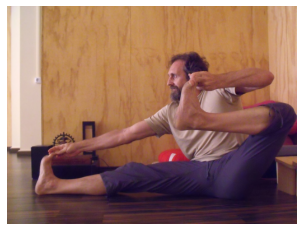

In [ ]:
## image_path = os.path.join(dataset_dir, 'train', 'Firefly', '101.jpg')

image_path = '/content/alldata/Akarna_Dhanurasana/47.jpg'
# image_path = '/content/101.jpg'
# image_path = '/content/523.jpg'
# image_path = '/content/1_80.jpg'
# image_path = '/content/7.jpg'
# image_path = '/content/14.jpg'
# image_path = '/content/324.jpg'
# image_path = '/content/103.jpg'
# image_path = '/content/330.jpg'
# image_path = '/content/133.jpg'

# misclassified images

# image_path = '/content/Boat_586.jpg'
# image_path = '/content/Bound_angle_1_125.jpg'
# image_path = '/content/F_0_61.jpg'
# image_path = '/content/F_186.jpg'
# image_path = '/content/F_189.jpg'
# image_path = '/content/F_207.jpg'

# image_path = '/content/Tw_136.jpg'
# image_path = '/content/Tw_148.jpg'
# image_path = '/content/Tw_499.jpg'
#image_path = '/content/1_80.jpg'
#image_path = '/content/324.jpg'
#image_path = '/content/330.jpg'
#image_path = '/content/103.jpg'
#image_path = '/content/14.jpg'
#image_path = '/content/7.jpg'
#image_path = '/content/108.jpg'
#image_path = '/content/1_80.jpg'
#image_path = '/content/101.jpg'
#image_path = '/content/523.jpg'
#image_path = '/content/189.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

## Preprocess the Image

In [ ]:
image_tensor = preprocess(image)
image_tensor = image_tensor.unsqueeze(0) # add an extra dimension
image_tensor = image_tensor.to(device)
image_tensor.size()

torch.Size([1, 3, 240, 240])

## Pick the Target Layer to Visualize

In [ ]:
target_layer = effnet_model._conv_head
# print(target_layer)
# target_layer = effnet_model._blocks[22]._expand_conv
# target_layer = effnet_model._blocks[22]._project_conv

## Grad CAM, Grad CAM++ and Smooth Grad CAM ++

Uncomment any one and use

In [ ]:
# wrapped_model =GradCAM(effnet_model, target_layer)
#wrapped_model = GradCAMpp(effnet_model, target_layer)
wrapped_model = SmoothGradCAMpp(effnet_model, target_layer, n_samples=25, stdev_spread=0.15)

## Visualize the Heatmap

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 0	 probability 0.9999431371688843

Heat map size:  (8, 8)
Class index:  0


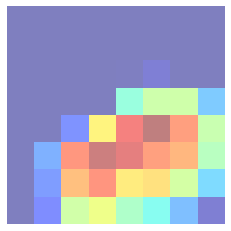

In [ ]:
cam, idx = wrapped_model(image_tensor)
cam_img = cam.squeeze().cpu().numpy()

print()
print("Heat map size: ", cam_img.shape)
print("Class index: ", idx)
plt.imshow(cam_img, alpha=0.5, cmap='jet')
plt.axis('off')
plt.show()

## Overlap Heatmap on the Image

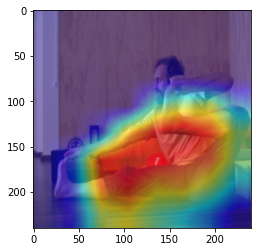

In [ ]:
img = reverse_normalize(image_tensor)
cam = cam.cpu()
heatmap = visualize(img, cam)

hm = (heatmap.squeeze().numpy().transpose(1, 2, 0)).astype(np.float32)
imshow(hm)

In [ ]:
hm.shape

(240, 240, 3)

In [ ]:
%cd /content/

/content


In [ ]:
import cv2
saved_cam = hm * 255
saved_cam = cv2.cvtColor(saved_cam, cv2.COLOR_BGR2RGB)
cv2.imwrite('cam.jpg', saved_cam)

True

In [ ]:
saved_cam.shape

(240, 240, 3)

In [ ]:
## 'cam' is the heatmap from smoothgradcampp
cam.shape

torch.Size([1, 1, 8, 8])

In [ ]:
##Resizing to 240x240, for overlaying on og image
import cv2
cam_new = cam[0][0]
cam_new = cv2.resize(cam_new.numpy(),(240,240))
cam_new = 255*cam_new

In [ ]:
cam_new.shape
np.max(cam_new)

254.05739

###----- Smooth gradpp part ends here -----


###TRANSPOSE PART STARTS HERE


In [2]:
%cd /content/


/content


In [3]:
!git clone https://github.com/nishantr05/TransPose.git

Cloning into 'TransPose'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 108 (delta 37), reused 75 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 3.69 MiB | 14.32 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [4]:
import os
os.getcwd()
os.chdir('/content/TransPose/')

In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 122kB 6.4MB/s 
  Created wheel for EasyDict: filename=easydict-1.7-cp37-none-any.whl size=6121 sha256=c087de2caed0627e5a00c9baebf03fb5f719babc6dc797a659f91b75529e35b1
  Stored in directory: /root/.cache/pip/wheels/58/40/dd/87bc05b3d56641ccb8f099babf6ff5faed5db5c03c5d837450
Successfully built EasyDict
  Found existing installation: easydict 1.9
    Uninstalling easydict-1.9:
      Successfully uninstalled easydict-1.9


In [6]:
# Importing the model
import torch
tpr = torch.hub.load('yangsenius/TransPose:main', 'tpr_a4_256x192', pretrained=True)

Downloading: "https://github.com/yangsenius/TransPose/archive/main.zip" to /root/.cache/torch/hub/main.zip


download https://github.com/yangsenius/TransPose/releases/download/Yaml/TP_R_256x192_d256_h1024_enc4_mh8.yaml



>>Load pretrained weights from url: https://github.com/yangsenius/TransPose/releases/download/Hub/tp_r_256x192_enc4_d256_h1024_mh8.pth



Successfully loaded model  (on cpu) with pretrained weights!


In [12]:
# Preprocessing
from torchvision import transforms
preprocess =  transforms.Compose([
    transforms.Resize((256,192)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In [13]:
###--No need to run--###
# Import image and convert it to a tensor.
from PIL import Image
img1 = Image.open("/content/alldata/Images/Chair_Pose_or_Utkatasana_/493.jpg").convert('RGB')

# data = torchvision.datasets.ImageFolder(root="/content/alldata/", transform=preprocess)
# img_batch = torch.utils.data.DataLoader(data, batch_size=64,shuffle = False)
img_tensor = preprocess(img1)
type(img_tensor)
img_tensor.shape

torch.Size([3, 256, 192])

In [ ]:
data.class_to_idx

In [ ]:
data.imgs

In [14]:
# This is to add a dimension to the image to make it of shape [batch size, channel, height, width]
img_unsqueeze = torch.unsqueeze(img_tensor, 0)
img_unsqueeze.shape

torch.Size([1, 3, 256, 192])

In [15]:
#putting the model in evaluation mode
## NO need
tpr = tpr.eval()

In [16]:
# The model returns heatmaps for 17 joint locations of shape [batch_size, num_joints, height, width]
## NO need
joints_heatmaps = tpr(img_unsqueeze)
joints_heatmaps.shape

torch.Size([1, 17, 64, 48])

In [ ]:
!pwd

/content/TransPose/lib/utils


In [ ]:
# Changing Directory to the utils to use the Vis.py file
os.chdir('/content/TransPose/lib/')

In [ ]:
from utils.vis import save_batch_heatmaps

In [ ]:
###---VISUALIZING INDIVIDUAL HEATMAPS---###
## Saves each joint heat map, in seperate file (uncomment to run)
# import numpy as np
# import cv2
# imgs = np.array(imgs)
# file_names = {0: 'nose', 1: 'l_eye', 2: 'r_eye', 3: 'l_ear', 4: 'r_ear', 5 : 'l_shoulder', 6 : 'r_shoulder',
#               7 : 'l_elbow', 8 : 'r_elbow' , 9 : 'l_wrist', 10 : 'r_wrist', 11 : 'l_hip', 12 : 'r_hip', 
#               13 : 'l_knee', 14 :'r_knee', 15 : 'l_ankle', 16 : 'r_ankle'}
# # This function of the vis.py file saves the heatmaps for 17 joint locations
# # in the current directory
# imgs = save_batch_heatmaps(img_unsqueeze, joints_heatmaps, '/content/result1.jpg')
# folder = '/content/'
# for i in range(17):
#   cv2.imwrite(folder+file_names[i]+'.jpg', imgs[i])

In [ ]:
imgs = save_batch_heatmaps(img_unsqueeze, joints_heatmaps, '/content/Batch_heatmaps.jpg')

In [ ]:
###----Overlapping heatmaps----###
from core.inference import get_max_preds
import numpy as np
import cv2

##--This func takes in 17 joint heatmaps and and returns one single superimposed heatmap.
##--Also overalys this final heat_map on 240x240 image.
def overlap_heatmaps(batch_image, batch_heatmaps, file_name, normalize=True):
    '''
    batch_image: [batch_size, channel, height, width] (pre-processed imgtensor -- make sure it's 240x240!!
    batch_heatmaps: [batch_size, height, width] (combined heatmaps of all joints)
    file_name: saved file name
    '''
    # if normalize:
    #     batch_image = batch_image.clone()
    #     min = float(batch_image.min())
    #     max = float(batch_image.max())

    #     batch_image.add_(-min).div_(max - min + 1e-5)

    batch_size = batch_heatmaps.size(0)
    #num_joints = batch_heatmaps.size(1)
    heatmap_height = batch_heatmaps.size(1)
    heatmap_width = batch_heatmaps.size(2)

    #print(batch_heatmaps.shape)
    heatmaps = []
    for i in range(batch_size):
        # image = batch_image[i].mul(255)\
        #                       .clamp(0, 255)\
        #                       .byte()\
        #                       .permute(1, 2, 0)\
        #                       .cpu().numpy()
        image = batch_image[i]
        heatmap = batch_heatmaps[i].mul(255)\
                                    .clamp(0, 255)\
                                    .byte()\
                                    .cpu().numpy()

        #heatmap_r = cv2.resize(heatmap, (batch_image.size(3),batch_image.size(2)))
        heatmap_return = cv2.resize(heatmap, (192,256)) ##For eff-net image
        colored_heatmap_r = cv2.applyColorMap(heatmap_return, cv2.COLORMAP_JET)
        masked_image_r = colored_heatmap_r*0.7 + image*0.3
      
        print(cv2.imwrite(file_name[:-4]+str(i)+'.jpg', masked_image_r))
        heatmaps.append(heatmap_return)
    return np.array(heatmaps)
   

In [ ]:
import cv2
from google.colab.patches import  cv2_imshow

In [ ]:
##Converting original image to numpy and resizing
img1 = cv2.resize(np.array(img1), (192,256))
print(type(img1))
img1.shape

<class 'numpy.ndarray'>


(256, 192, 3)

In [ ]:
##Converting from BGR to RGB 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

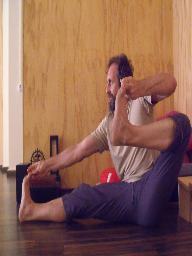

In [ ]:
cv2_imshow(img1)

In [ ]:
!pwd

/content/TransPose/lib


In [ ]:
os.listdir('/content/TransPose')

In [9]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Images_cleaned2.zip", 'r')
zip_ref.extractall("/content/alldata")
zip_ref.close()

In [ ]:
img_data = torchvision.datasets.ImageFolder(root="/content/alldata/Images", transform=preprocess)
img_batch = torch.utils.data.DataLoader(img_data, batch_size=1,shuffle = False)
# img_tensor = preprocess(img1)
# type(img_tensor)
# img_tensor.shape

In [ ]:
## Verifying the order of images only
for batch_idx, (data, target) in enumerate(img_batch):
  print(batch_idx)
  if batch_idx > 9:
    break
  print(data.max())
  img = data[0].mul(255)\
                        .clamp(0, 255)\
                        .byte()\
                        .cpu().permute(1,2,0).numpy()

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2_imshow(img)

In [ ]:
img_data.class_to_idx

In [ ]:
i=0
##To be RUN ONLY once
for name in os.listdir("/content/alldata"):
  os.mkdir('/content/drive/MyDrive/khp_Yoga8/'+name)
  print(name)
  

HandStand
Twist_pose
Boat_pose
Lord_of_dance
Images
Bound_angle_pose
Firefly_Pose
HappyBaby
Akarna_Dhanurasana


In [ ]:
len(img_data.imgs)

24972

In [ ]:
file_save = []
for pair in img_data.imgs:
  idx = pair[0].rfind('/')
  file_save.append('khp_'+pair[0][idx+1:])

In [ ]:
len(file_save)

24971

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

tpr.to(device)
tpr = tpr.eval()
#effnet_model.eval()

In [ ]:
img_data.class_to_idx

In [ ]:
idx_to_class = {value : key for (key, value) in img_data.class_to_idx.items()}

In [ ]:
idx_to_class

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
##Calling the function for adding up the indv heatmaps
cnt = 0
for batch_idx, (data, target) in enumerate(img_batch):
  if(batch_idx%1000 == 0) :
    print(batch_idx)
    #print("Here__")
  data = data.to(device)
  target = target.to(device)
  joints_heatmaps = tpr(data) ##joint heatmaps for entire batch.
  batch_heatmaps = torch.sum(joints_heatmaps[:,:,:,:],axis = 1) ##all joints on same heatmap
  #joints_heatmaps.shape
  ##---looping thru batch heatmaps---##
  
  batch_size = batch_heatmaps.size(0)
  #num_joints = batch_heatmaps.size(1)
  heatmap_height = batch_heatmaps.size(1)
  heatmap_width = batch_heatmaps.size(2)
  #print(batch_heatmaps.shape)
  heatmaps = []
  for i in range(batch_size):
        heatmap = batch_heatmaps[i].mul(255)\
                                    .clamp(0, 255)\
                                    .byte()\
                                    .cpu().numpy()

        #heatmap_r = cv2.resize(heatmap, (batch_image.size(3),batch_image.size(2)))
        heatmap = cv2.resize(heatmap, (192,256)) ##Transpose size
        norm_image = cv2.normalize(heatmap, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, 
                                   dtype = cv2.CV_32F)
        norm_img = norm_image.astype(np.uint8)
        ##__filename based
        f_num = img_data.imgs[cnt][1] ##-- folder num
        cv2.imwrite('/content/drive/MyDrive/Keypoint_heatmaps/'+idx_to_class[f_num]+'/'+file_save[cnt], norm_img)
        cnt += 1
  

0


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1000
2000


In [18]:
import cv2

In [21]:
  batch_heatmaps = torch.sum(joints_heatmaps[:,:,:,:],axis = 1) ##all joints on same heatmap
  #joints_heatmaps.shape
  ##---looping thru batch heatmaps---##
  
  batch_size = batch_heatmaps.size(0)
  #num_joints = batch_heatmaps.size(1)
  heatmap_height = batch_heatmaps.size(1)
  heatmap_width = batch_heatmaps.size(2)
  #print(batch_heatmaps.shape)
  heatmaps = []
  for i in range(batch_size):
        heatmap = batch_heatmaps[i].mul(255)\
                                    .clamp(0, 255)\
                                    .byte()\
                                    .cpu().numpy()

        #heatmap_r = cv2.resize(heatmap, (batch_image.size(3),batch_image.size(2)))
        heatmap = cv2.resize(heatmap, (192,256)) ##Transpose size
        norm_image = cv2.normalize(heatmap, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, 
                                   dtype = cv2.CV_32F)
        norm_img = norm_image.astype(np.uint8)

In [22]:
cv2.imwrite('/content/khp_493.jpg', norm_img)

True

In [24]:
s = "khp_667.jpg"
s[4:]

'667.jpg'

In [26]:
i = 0
PATH = "/content/drive/MyDrive/Keypoint_heatmaps/"
for name in os.listdir("/content/drive/MyDrive/Keypoint_heatmaps/"):
  for f_name in os.listdir("/content/drive/MyDrive/Keypoint_heatmaps/"+name):
    os.rename(PATH+name+'/'+f_name, PATH+name+'/'+f_name[4:])

print(i)

0


In [ ]:
final_heatmaps.shape

(1, 256, 192)

In [ ]:
#final_heatmaps has pixel values from 1-255
#same for cam_new
print(np.max(final_heatmaps[0]))
#print(np.max(cam_new))

255


NameError: ignored

In [ ]:
heatmap_haddamard = (final_heatmaps[0]*cam_new)
#colored_heatmap_r = cv2.applyColorMap((heatmap_haddamard).astype(np.uint8), cv2.COLORMAP_JET)
norm_image = cv2.normalize(heatmap_haddamard, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, 
                           dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)
colored_heatmap_r = cv2.applyColorMap(norm_image, cv2.COLORMAP_JET)
masked_image_r = colored_heatmap_r*0.6 + img1*0.4

In [ ]:
!pwd

/content/TransPose/lib/utils


In [ ]:
%cd /content/

/content


In [ ]:
##Heatmap of smoothgradcpp haddamard transpose heatmap
## Make sure you're in /content before saving!
cv2.imwrite('SGCPPxTP.jpg', masked_image_r)

True

###----Smoothgradcam * Transpose part ends here----

###---Smoothgradcam * Gaussian blurred joint starts here---

In [ ]:
joints_heatmaps.shape

torch.Size([1, 17, 64, 48])

In [ ]:
preds, maxvals = get_max_preds(joints_heatmaps.detach().cpu().numpy())

In [ ]:
maxvals

array([[[0.49836397],
        [0.5167143 ],
        [0.664228  ],
        [0.35689935],
        [0.7836415 ],
        [0.3006056 ],
        [0.67496556],
        [1.0585414 ],
        [0.15882818],
        [0.86386967],
        [0.39199942],
        [0.5125272 ],
        [0.28464836],
        [0.2720185 ],
        [0.766755  ],
        [0.13967232],
        [0.6186081 ]]], dtype=float32)

In [ ]:
##Printing the preds, which are in 64x48 co-ordinate frame
preds #(x,y)

array([[[27., 24.],
        [27., 22.],
        [27., 22.],
        [24., 22.],
        [24., 22.],
        [27., 31.],
        [21., 26.],
        [25., 37.],
        [30., 19.],
        [22., 46.],
        [36., 10.],
        [17., 43.],
        [17., 41.],
        [27., 27.],
        [25., 29.],
        [19., 45.],
        [34., 16.]]], dtype=float32)

In [ ]:
preds.shape

(1, 17, 2)

In [ ]:
## Rescaling to 240x240 scale
Rx = 240.0/48.0
Ry = 240.0/64.0
new_preds = np.zeros_like(preds)
for i in range(17):
  new_preds[0][i][0] = preds[0][i][0] * Rx
  new_preds[0][i][1] = preds[0][i][1] * Ry

In [ ]:
new_preds

array([[[135.  ,  90.  ],
        [135.  ,  82.5 ],
        [135.  ,  82.5 ],
        [120.  ,  82.5 ],
        [120.  ,  82.5 ],
        [135.  , 116.25],
        [105.  ,  97.5 ],
        [125.  , 138.75],
        [150.  ,  71.25],
        [110.  , 172.5 ],
        [180.  ,  37.5 ],
        [ 85.  , 161.25],
        [ 85.  , 153.75],
        [135.  , 101.25],
        [125.  , 108.75],
        [ 95.  , 168.75],
        [170.  ,  60.  ]]], dtype=float32)

In [ ]:
##co_ords[i][1] is 'y' co-ordinate, which corresponds to row number
## 'Bed of nails', with the spikes at location of joints
co_ords = (new_preds[0]).astype(int)
img_bed = np.zeros((240,240))
for i in range(17):
  img_bed[co_ords[i][1]][co_ords[i][0]] = 255

co_ords.shape

(17, 2)

In [ ]:
##Can change size of kernel accordingly
blur_img = cv2.GaussianBlur(img_bed,(15,15),0)

In [ ]:
##Scaling up the pixel values to lie in between 0-255
blur_img = np.clip(((255/np.max(blur_img))*blur_img),0,255)

In [ ]:
np.max(blur_img)

254.99999999999997

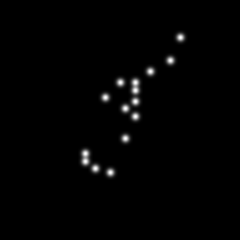

In [ ]:
cv2_imshow(blur_img)

In [ ]:
##Hadamard of gaussian_blurred image joints and cam heatmap

heatmap_haddamard_blur = (blur_img*cam_new)
#colored_heatmap_r = cv2.applyColorMap((heatmap_haddamard).astype(np.uint8), cv2.COLORMAP_JET)
norm_image = cv2.normalize(heatmap_haddamard_blur, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, 
                           dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)
colored_heatmap_r = cv2.applyColorMap(norm_image, cv2.COLORMAP_JET)
masked_image_new = colored_heatmap_r*0.6 + img1*0.4

In [ ]:
cv2.imwrite('SGCPPxGB.jpg', masked_image_new)

True

In [ ]:
## __Really necessary__??## Uniform Blur

uniform_blur = np.zeros((240,240))
uniform_blur[blur_img > 0] = 255

In [ ]:
np.max(uniform_blur)

255.0

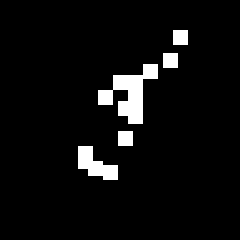

In [ ]:
cv2_imshow(uniform_blur)

In [ ]:
##Hadamard of uniform_blurred image joints and cam heatmap

heatmap_haddamard_blur = (uniform_blur*cam_new)
#colored_heatmap_r = cv2.applyColorMap((heatmap_haddamard).astype(np.uint8), cv2.COLORMAP_JET)
norm_image = cv2.normalize(heatmap_haddamard_blur, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, 
                           dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)
colored_heatmap_r = cv2.applyColorMap(norm_image, cv2.COLORMAP_JET)
masked_image = colored_heatmap_r*0.6 + img1*0.4

In [ ]:
cv2.imwrite('SGCPPxUB.jpg', masked_image)

True